In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [70]:
dataset = pd.read_csv('housing.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

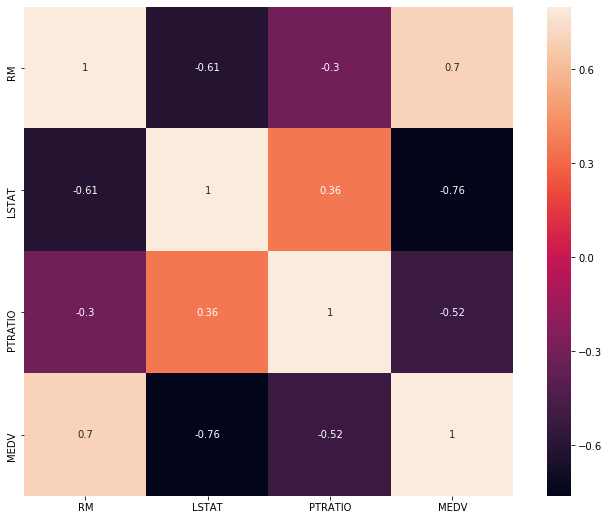

In [71]:
corrmat=dataset.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8, square= True,annot=True)
plt.show()

In [72]:
dataset.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


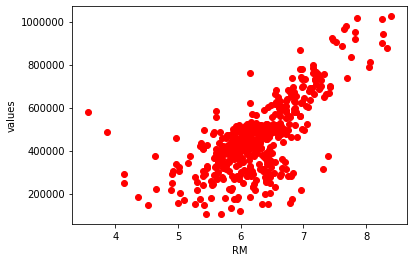

In [73]:
plt.scatter(dataset['RM'], y, color = 'red')
plt.xlabel('RM')
plt.ylabel('values')
plt.show()

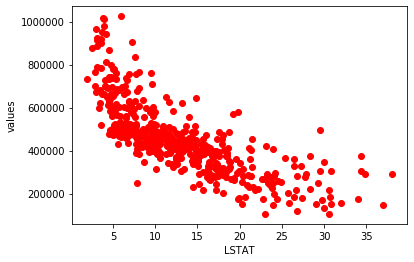

In [74]:
plt.scatter(dataset['LSTAT'], y, color = 'red')
plt.xlabel('LSTAT')
plt.ylabel('values')
plt.show()

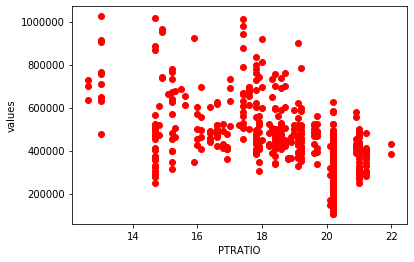

In [75]:
plt.scatter(dataset['PTRATIO'], y, color = 'red')
plt.xlabel('PTRATIO')
plt.ylabel('values')
plt.show()

In [76]:
from sklearn.model_selection import train_test_split

In [106]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [191]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [192]:
y_pred = regressor.predict(X_test)

Text(0, 0.5, 'Predicted y')

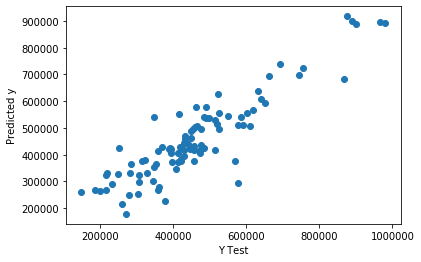

In [193]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted y')

In [194]:
# Evaluate the data
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE 56317.142857142855
MSE 5413281057.0
RMSE 73575.00293577976


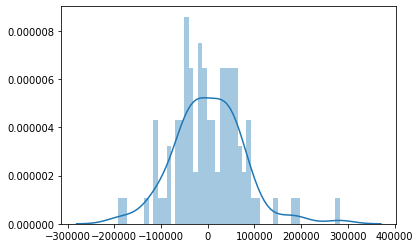

In [202]:
sns.distplot((y_test - y_pred), bins=50)

In [203]:
metrics.r2_score(y_test,y_pred)

0.8093803031023303

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [205]:
y_train_predict = lin_reg_2.predict(X_train_poly)
y_test_predict = lin_reg_2.predict(X_test_poly)

Text(0, 0.5, 'Predicted y')

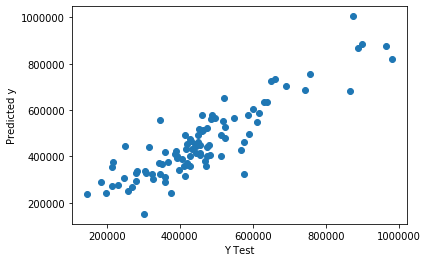

In [206]:
plt.scatter(y_test, y_test_predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted y')

In [207]:
# Evaluate the data
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, y_test_predict))
print("MSE", metrics.mean_squared_error(y_test, y_test_predict))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

MAE 59319.341860757646
MSE 6224405553.802803
RMSE 78894.9019506508


In [208]:
metrics.r2_score(y_test,y_test_predict)

0.7808179018342697